# Project: Regression

## Red Wine Quality

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
import importlib
import functions_sandbox
importlib.reload(functions_sandbox)
from functions_sandbox import cleaner, f_histogram, f_boxplot

path = r"D:.\redwine.csv"
redwine = pd.read_csv(path)

In [2]:
redwine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
redwine.tail(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Checking basic information about dataframe, columns, variables.

In [4]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are 12 columns in total with 1600 entries.  
Mostly every column has float Dtype and describes physicochemical properties of red wine.  
Must to mention, that despite quality named column Dtype is int,  
it's variables are categorical type.

In [5]:
redwine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## Data cleaning

In [6]:
redwine = cleaner(redwine, info=False)
redwine.rename(
    columns={
        "fixed acidity": "fixed_acidity",
        "volatile acidity": "volatile_acidity",
        "citric acid": "citric_acid",
        "residual sugar": "residual_sugar",
        "free sulfur dioxide": "free_so2",
        "total sulfur dioxide": "total_so2",
    },
    inplace=True,
)
redwine.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


Some of the column labels were renamed to leave no empty spaces  
between words

## Exploratory Data Analysis (EDA)

First of all, check on how many levels of wine quality exists

In [7]:
wine_quality = sorted(redwine["quality"].unique())
print(f"wine quality levels: {wine_quality}")

wine quality levels: [3, 4, 5, 6, 7, 8]


There are 6 levels of wine **quality** where No.3  
is the poorest and No.8 is the highest level of wine

To check how data is distributed of wine **quality**  
histogram was plotted

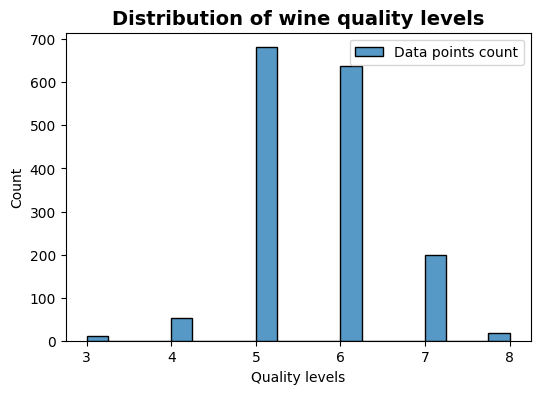

In [8]:
f_histogram(
    xaxis=redwine["quality"],
    bins=20,
    label="Data points count",
    xlabel="Quality levels",
    title="Distribution of wine quality levels",
)

From the plot we can see that data on wine **quality** is normaly  
distributed where 5 and 6 **quality** levels in other words average quality wine  
has the most data points

Now every feature of the dataset will be checked visually  
with boxplots to see how data is distributed on all **quality**  
levels

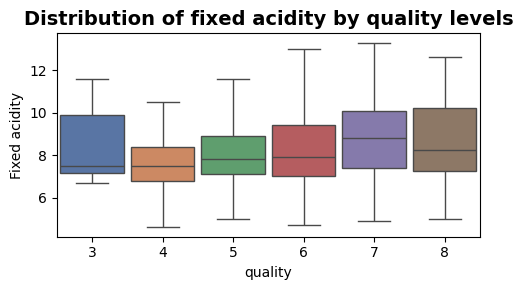

In [9]:
#fixed_acidity
f_boxplot(
    data=redwine,
    xaxis="quality",
    yaxis="fixed_acidity",
    hue="quality",
    ylabel="Fixed acidity",
    title="Distribution of fixed acidity by quality levels"
)


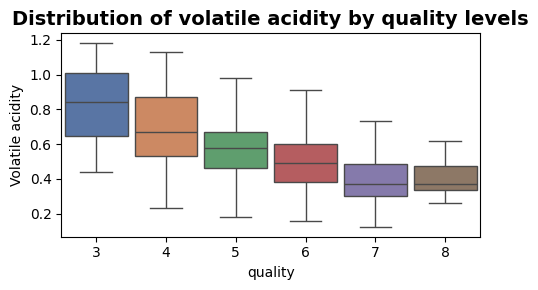

In [10]:
#volatile_acidity
f_boxplot(
    data=redwine,
    xaxis="quality",
    yaxis="volatile_acidity",
    hue="quality",
    ylabel="Volatile acidity",
    title="Distribution of volatile acidity by quality levels"
)


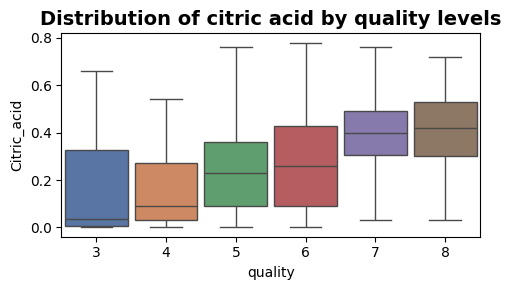

In [11]:
#citric_acid
f_boxplot(
    data=redwine,
    xaxis="quality",
    yaxis="citric_acid",
    hue="quality",
    ylabel="Citric_acid",
    title="Distribution of citric acid by quality levels"
)


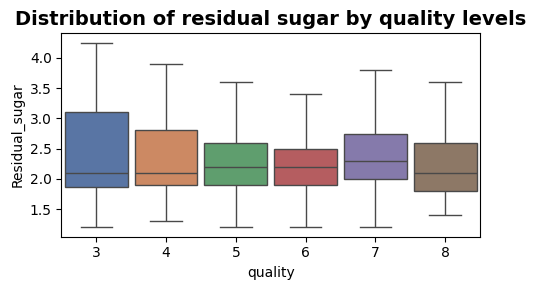

In [12]:
#residual_sugar
f_boxplot(
    data=redwine,
    xaxis="quality",
    yaxis="residual_sugar",
    hue="quality",
    ylabel="Residual_sugar",
    title="Distribution of residual sugar by quality levels"
)


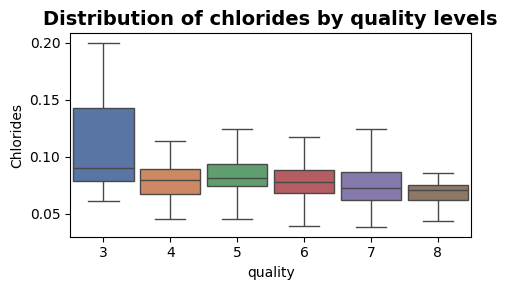

In [13]:
#chlorides
f_boxplot(
    data=redwine,
    xaxis="quality",
    yaxis="chlorides",
    hue="quality",
    ylabel="Chlorides",
    title="Distribution of chlorides by quality levels"
)


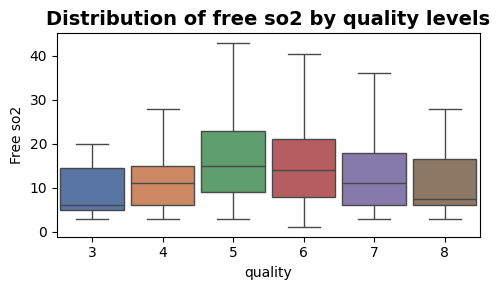

In [14]:
#free_so2
f_boxplot(
    data=redwine,
    xaxis="quality",
    yaxis="free_so2",
    hue="quality",
    ylabel="Free so2",
    title="Distribution of free so2 by quality levels"
)


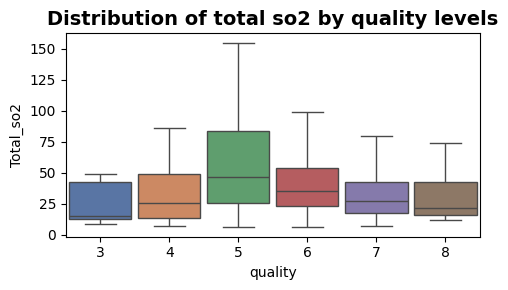

In [15]:
#total_so2
f_boxplot(
    data=redwine,
    xaxis="quality",
    yaxis="total_so2",
    hue="quality",
    ylabel="Total_so2",
    title="Distribution of total so2 by quality levels"
)


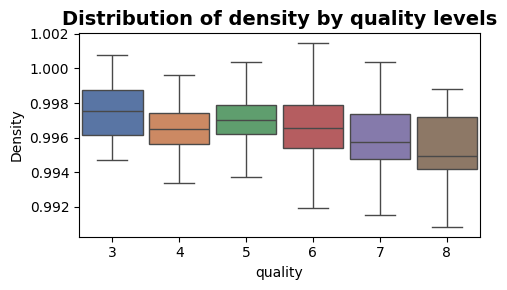

In [16]:
#density
f_boxplot(
    data=redwine,
    xaxis="quality",
    yaxis="density",
    hue="quality",
    ylabel="Density",
    title="Distribution of density by quality levels"
)


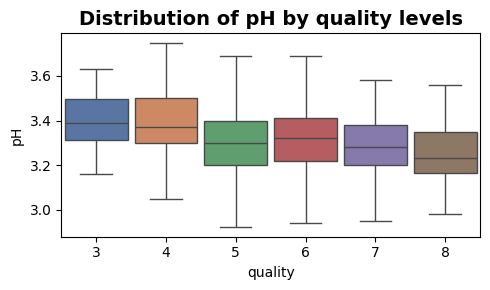

In [17]:
#ph
f_boxplot(
    data=redwine,
    xaxis="quality",
    yaxis="ph",
    hue="quality",
    ylabel="pH",
    title="Distribution of pH by quality levels"
)


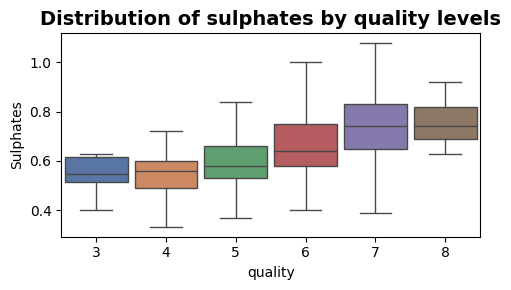

In [18]:
#sulphates
f_boxplot(
    data=redwine,
    xaxis="quality",
    yaxis="sulphates",
    hue="quality",
    ylabel="Sulphates",
    title="Distribution of sulphates by quality levels"
)


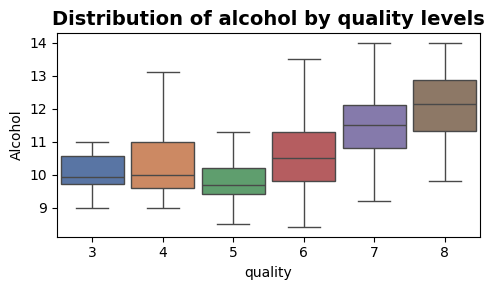

In [19]:
#alcohol
f_boxplot(
    data=redwine,
    xaxis="quality",
    yaxis="alcohol",
    hue="quality",
    ylabel="Alcohol",
    title="Distribution of alcohol by quality levels"
)


In [31]:
redwine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


By pair plotting, a relationship between different features will  
be checked and how it behaves with each other

<Figure size 1000x1000 with 0 Axes>

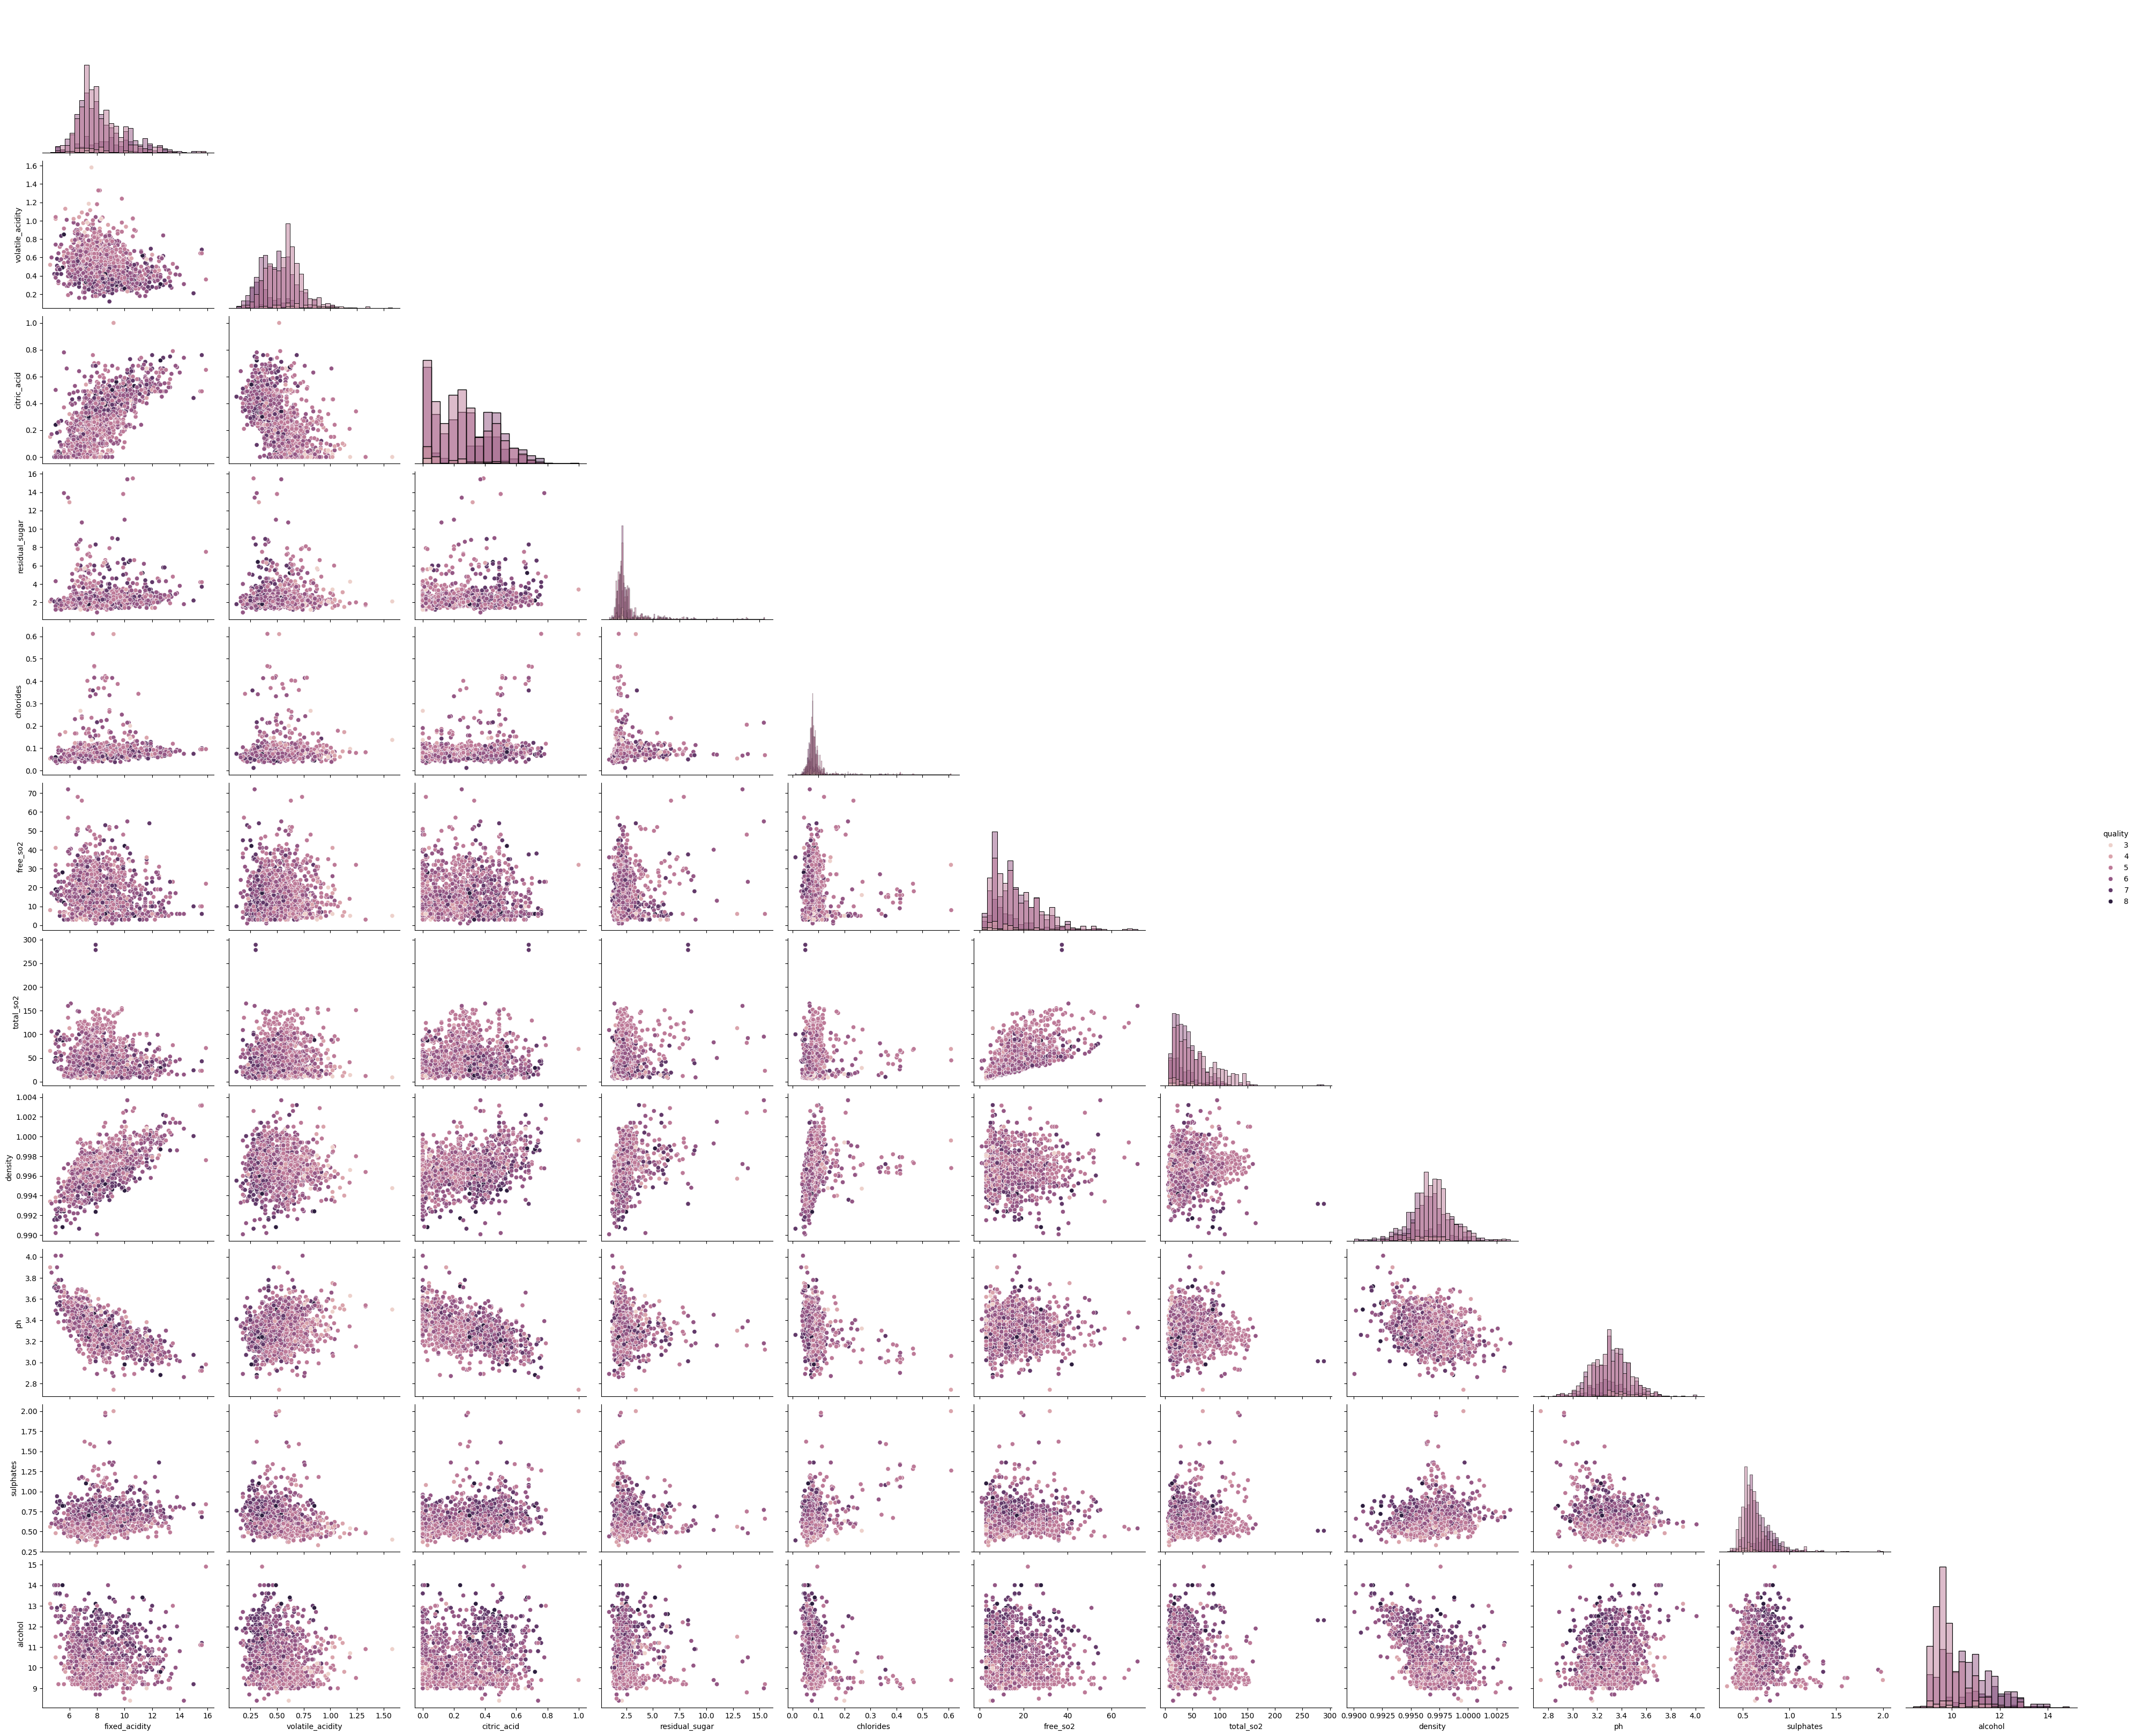

In [36]:
plt.figure(figsize=(10, 10))
sns.pairplot(redwine, diag_kind="hist", hue="quality", height=3, aspect=1.2, corner=True)

plt.show()

Multicollinearity is detected between some of the features:  
- Citric acid and free acidity (positive correlation)
- Density and free acidity (positive correlation)
- pH and free acidity (negative correlation)
- pH and citric acid (negative correlation)
- total sulfur dioxide and free sulfur dioxide (positive correlation)  
  
By performing deeper investigation, this phenomenon must be kept in  
mind when comparing to any of mentioned features with dependant **quality** feature.  
Especially when using OLS in statsmodels.

Multicollinearity could be also detected using Variance Inflation  
Factor (VIF). Having VIF > 10 suggests that there is feature correlation  
with other variables

In [44]:
x = redwine.iloc[:,:-1]
functions_sandbox.calc_vif(x)

,variables,VIF
0,fixed acidity,74.452265
1,volatile acidity,17.060026
2,citric acid,9.183495
3,residual sugar,4.662992
4,chlorides,6.554877
5,free sulfur dioxide,6.442682
6,total sulfur dioxide,6.519699
7,density,1479.287209
8,pH,1070.967685
9,sulphates,21.590621


It can be seen huge impact of data redundancy density and pH.  
By dropping highest VIF variables, there is possibility to decrease  
redundancy in our dataset

In [47]:
x = redwine.iloc[:,:-1].drop(["density", "pH"], axis=1)
functions_sandbox.calc_vif(x)

,variables,VIF
0,fixed acidity,37.557809
1,volatile acidity,15.651760
2,citric acid,8.636667
3,residual sugar,4.660704
4,chlorides,5.935002
5,free sulfur dioxide,6.357695
6,total sulfur dioxide,5.987189
7,sulphates,21.218142
8,alcohol,37.137148


We have left with VIF < 10 on citric acid, residual sugar, chlorides,  
free sulfur dioxide and total sulfur dioxide which are independant values